# Radioactive decay (first order reaction)

One example of modelling random behaviour would be when considering radioactive decay - where a parent radioactive isotope decays into a daughter isotope.

If we consider the simplest case of a nucleus decaying to one daughter product, we need to know the decay constant i.e. the probability a nuclei will decay in a given time interval.

In [1]:
import numpy as np
from numpy import random

In [2]:
seed = 20
rng = random.default_rng(seed)

In [3]:
probability_of_decay = 0.1  # per second
decay_sample = rng.random()

We can generate a random number which is associated with a nucleus but how do we relate this to the probability it has decayed?

We can compare our random number to the `probability_of_decay` variable to check this. If you ran this cell 10 times, approximately how many times would you expect this to print out "Nuclei has decayed" based on the `probability_of_decay` value of 0.1?

In [4]:
print(decay_sample)
if decay_sample <= probability_of_decay:
    print("Nucleus has decayed")
else:
    print("Nucleus has not decayed")

0.2800759626301593
Nucleus has not decayed


How would we do this for a large number of atoms? In the previous notebook we discussed how to generate random numbers for a whole sample at once:

In [5]:
number_of_atoms = 10
decay_sample = rng.random(number_of_atoms)
print(decay_sample)

[0.46114671 0.12171969 0.52260835 0.40916841 0.07163955 0.09896668
 0.98628836 0.69406788 0.44868846 0.64017681]


For the comparison step, we could loop through these values and check them against `probability_of_decay`:

In [6]:
for i, decay in enumerate(decay_sample):
    if decay <= probability_of_decay:
        print(f"Nucleus {i+1} has decayed")
    else:
        print(f"Nucleus {i+1} has not decayed")

Nucleus 1 has not decayed
Nucleus 2 has not decayed
Nucleus 3 has not decayed
Nucleus 4 has not decayed
Nucleus 5 has decayed
Nucleus 6 has decayed
Nucleus 7 has not decayed
Nucleus 8 has not decayed
Nucleus 9 has not decayed
Nucleus 10 has not decayed


However, one feature of `numpy` arrays is that we can compare conditions to the whole array at once. This will check the values element-wise, meaning each element will be compared against the condition separately:

In [7]:
decay_sample <= probability_of_decay

array([False, False, False, False,  True,  True, False, False, False,
       False])

This operation produces another array which is the same length as the original array but contains boolean values (`True` or `False`). Here we can see which comparisons evaluate to `True`, indicating which atoms have decayed in this time step.

Furthermore, we can even use this output to filter our original array. This uses the `True` and `False` values to map to the original array, one for each item, and filters it to only retain those elements which map to `True`:

In [8]:
sample_decayed = decay_sample[decay_sample <= probability_of_decay]
print(sample_decayed)
print(f"Number decayed in this time step: {len(sample_decayed)}")

[0.07163955 0.09896668]
Number decayed in this time step: 2


This is called [*Boolean array indexing*](https://numpy.org/doc/stable/reference/arrays.indexing.html#boolean-array-indexing)

---

### Question:

 - Using the same syntax as above to filter a numpy array, how would you filter `decay_sample` to only include the atoms which have *not* decayed?

In [9]:
# CAN ADD CODE HERE

---

## Creating a model of decaying nuclei

We can use this setup to consider of a set of radioactive nuclei and model their probabilistic behaviour as they decay. For this simple model, we don't care *which* atoms have decayed only *how many* so for each time step we can assess how many atoms have decayed and how many remain.

We can start with the total number of atoms and consider how many have decayed:

In [10]:
number_of_atoms = 1000
probability_of_decay = 0.1  # per time step (second)

decay_sample = rng.random(number_of_atoms)
atoms_decayed = decay_sample[decay_sample<=probability_of_decay]
num_decayed = len(atoms_decayed)
print(f"Number of atoms decayed in time step 1: {num_decayed}")

Number of atoms decayed in time step 1: 110


For the next time step we now have fewer atoms available to decay, so we should update the number of random samples we wish to produce:

In [11]:
num_remaining = number_of_atoms # initial number
num_remaining -= num_decayed # reduce by number of atoms decayed
print(f"Number of atoms remaining after time step 1: {num_remaining}")

Number of atoms remaining after time step 1: 890


We can then generate a new set of random numbers for the next time step:

In [12]:
decay_sample = rng.random(num_remaining)
atoms_decayed = decay_sample[decay_sample<=probability_of_decay]
num_decayed = len(atoms_decayed)
num_remaining -= num_decayed
print(f"Number of atoms remaining after time step 2: {num_remaining}")

Number of atoms remaining after time step 2: 790


What sort of loop would we want to use to iterate over this? What do need to know to end the model run? For this model, ideally we want to stop running as soon as all of the atoms have decayed. We could use either `num_remaining` or `num_decayed` to check this as they are equivalent.

In [13]:
import numpy as np
from numpy import random

# Create Random Number Generator with known seed
seed = 1
rng = random.default_rng(seed)

# Define input parameters
probability_of_decay = 0.1  # per time step (second)
time_step = 1 # second

# Set initial parameters
number_of_atoms = 1000

In [14]:
atoms_remaining = []
num_decayed = 0

num_remaining = number_of_atoms
while num_remaining > 0:
    # Add number of atoms at each step to list
    atoms_remaining.append(num_remaining)
    print(f"Number of undecayed atoms: {num_remaining}")
    
    # Generate random probabilites of decay (between 0 and 1, one for each parent nucleus)
    decay_sample = rng.random(num_remaining)
    
    # Filter decay_sample to only include atoms which have decayed
    atoms_decayed = decay_sample[decay_sample<=probability_of_decay]
    
    # Calculate total number of decayed atoms and update number remaining
    num_decayed = len(atoms_decayed)
    num_remaining -= num_decayed

atoms_remaining = np.array(atoms_remaining, dtype=int)
time = np.arange(0,len(atoms_remaining))*time_step

Number of undecayed atoms: 1000
Number of undecayed atoms: 908
Number of undecayed atoms: 821
Number of undecayed atoms: 730
Number of undecayed atoms: 650
Number of undecayed atoms: 591
Number of undecayed atoms: 525
Number of undecayed atoms: 477
Number of undecayed atoms: 426
Number of undecayed atoms: 383
Number of undecayed atoms: 351
Number of undecayed atoms: 319
Number of undecayed atoms: 282
Number of undecayed atoms: 253
Number of undecayed atoms: 223
Number of undecayed atoms: 202
Number of undecayed atoms: 181
Number of undecayed atoms: 170
Number of undecayed atoms: 155
Number of undecayed atoms: 137
Number of undecayed atoms: 128
Number of undecayed atoms: 117
Number of undecayed atoms: 108
Number of undecayed atoms: 90
Number of undecayed atoms: 81
Number of undecayed atoms: 71
Number of undecayed atoms: 65
Number of undecayed atoms: 55
Number of undecayed atoms: 55
Number of undecayed atoms: 47
Number of undecayed atoms: 44
Number of undecayed atoms: 39
Number of undeca

In [15]:
print(f"Number of steps: {len(atoms_remaining)}")

Number of steps: 59


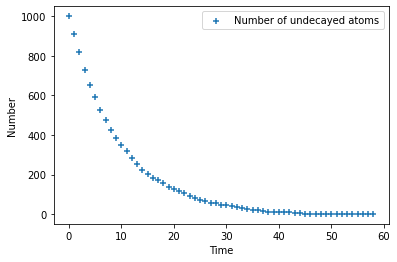

In [16]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.scatter(time, atoms_remaining, marker='+', label="Number of undecayed atoms")

ax.set_xlabel("Time")
ax.set_ylabel("Number")
ax.legend()

We can look at this same plot as a logorithm. To do this we can calculate the log of our `atoms_remaining` array using the `log()` function available within `numpy`. We should see this as a constant decay:

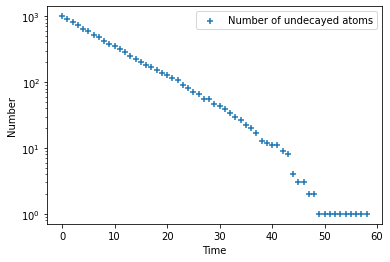

In [17]:
log_atoms_remaining = np.log(atoms_remaining)

fig,ax = plt.subplots()

ax.scatter(time, atoms_remaining, marker='+', label="Number of undecayed atoms")
ax.set_yscale('log')

ax.set_xlabel("Time")
ax.set_ylabel("Number")
ax.legend()

Overall this *is* a constant decay but when we reach low numbers, we start to see deviation due to the nature of probability and low number statistics.

Notice that the probability we sampled from was a *uniform* distribution, but the output we produced from the model is an exponential relationship - we derived the exponential form using this model.

## Deriving statistics

The half-life is the time it takes for half of the nuclei to decay. This is related to the decay constant by the equation:

$$ t_{\frac{1}{2}} = \frac{\ln(2)}{\lambda} $$

where:
 - $t_{\frac{1}{2}}$ - time taken for half of the nuclei to decay (s)
 - $\lambda$ - decay rate (s$^{-1}$)
 
Because we have used time steps equal to 1 second that means that our `probability_of_decay` is the same as the decay rate, $\lambda$, for this model.

---

### Exercise C

 1. Calculate the half-life for the model created above using this equation.
 2. Using `atoms_remaining` can you find the nearest array element which would represent the half-life?
  - To find the *nearest* value within an array you can start by taking the original array and subtracting the value you want to find.
     - In this case you want to compare to the value of `number_of_atoms/2`
  - You can then find the smallest magnitude difference and the index that equates to.
 3. What time value does this equate to within `time` array? How does this compare to the half-life value calculated using the equation?
 4. The radioative isotope Cobalt-60 has a half-life of 5.26 years. What would you need to update in the model above to simulate this radioactive decay? What would this look like if you re-ran the model with this value?
 
*Hint:*
 - *The `np.abs()` function can be used to calculate the absolute magnitude i.e. the value regardless of whether this is positive or negative.*

In [18]:
# CAN ADD CODE HERE

In [19]:
# CAN ADD CODE HERE

In [20]:
# CAN ADD CODE HERE

In [21]:
# CAN ADD CODE HERE

---